<a href="https://colab.research.google.com/github/PRihana/Machine-learning/blob/master/06_04_2020(ML)Ridge_Losso_EN_RFE_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1.CRIM per capita crime rate by 

2.ZN proportion of residential land zoned for lots over 25,000 sq.ft.

3.INDUS proportion of non-retail business acres per town

4.CHAS Charles River dummy variable (= 1 if tract bounds

          river; 0 otherwise)

5.NOX nitric oxides concentration (parts per 10 million)

6.RM average number of rooms per dwelling

7.AGE proportion of owner-occupied units built prior to 1940

8.DIS weighted distances to five Boston employment centres

9.RAD index of accessibility to radial highways

10.TAX full-value property-tax rate per $10,000
PTRATIO pupil-teacher ratio by town 12.B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

11.LSTAT % lower status of the population

12.MEDV Median value of owner-occupied homes in $1000's

In [0]:
data = pd.read_csv("/content/bostonhousing.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [0]:
data.isnull().sum().sum()

0

In [0]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

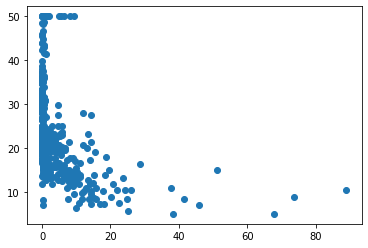

In [0]:
plt.scatter(data['crim'],data['medv'])

In [0]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


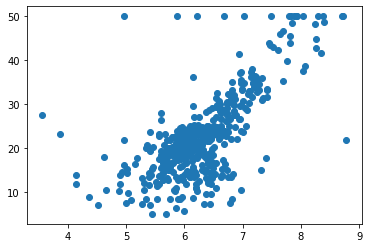

In [0]:
# Positive correlation --> 0.695360
plt.scatter(data['rm'],data['medv'])

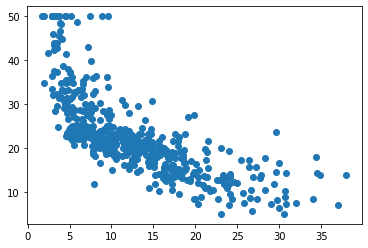

In [0]:
# Negative correlation --> -0.737663	
plt.scatter(data['lstat'],data['medv'])

In [0]:
y_pred = np.array([23,34,27,78,99.3]) 
y_obs = np.array([25,32,25.5,77,95])
# mean squared error(MSE)
np.mean((y_pred-y_obs)**2)

5.947999999999995

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_obs)

5.947999999999995

In [0]:
# Root mean squared error(RMSE)
np.sqrt(np.mean((y_pred-y_obs)**2))

2.438852189043033

In [0]:
# Mean Absolute error
np.sqrt(np.mean(np.abs(y_pred-y_obs)))

1.4696938456699067

**Create a model with single feature lstat and target is medv**

In [0]:
# Get the featrure data as a dataframe
x_data = data[['lstat']]
y_data = data['medv']

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

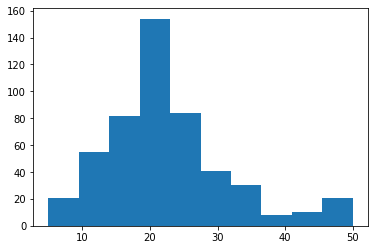

In [0]:
# observe the histogram of the target column
plt.hist(y_data)

In [0]:
# Divide the data for tarining and testing
# train_test_split and use test_size as 0.2
# 20% for testing and 80% for training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2)
print(x_train.shape)
print(y_train.shape)

(404, 1)
(404,)


In [0]:
x_data.shape[0]*0.8

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

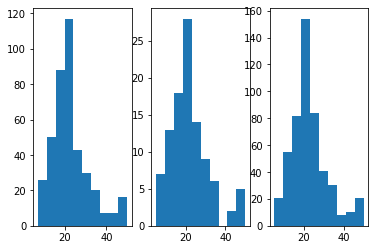

In [22]:
plt.subplot(1,3,1)
plt.hist(y_train)
plt.subplot(1,3,2)
plt.hist(y_test)
plt.subplot(1,3,3)
plt.hist(y_data)

In [23]:
# Linear regression
# import the model
from sklearn.linear_model import LinearRegression
# Create an instance for the model
LR = LinearRegression()
# Training the model 
LR.fit(x_train,y_train)
# Predict the output
LR.predict(x_test)

array([17.35491095, 24.90930489, 24.9277078 , 26.82320738, 31.58956068,
       28.2678357 ,  2.92703068, 18.48668983, 30.03451491, 29.90569455,
       30.77063125, 26.46435066, 12.75418383, 18.05422148, 18.67992036,
       22.88498496, 25.48899651, 24.61485836, 19.37923089, 30.05291782,
       18.64311455, 14.18961069, 18.44068255, 20.74104612, 17.86099094,
       19.2964178 , 26.14229976, 23.99836092, 10.60104353,  6.69042547,
       25.82024887, 23.90634638, 31.36872578, 22.23168171, 20.8054563 ,
       29.15117531, 23.0782155 , 27.78015862, 27.14525828, 11.30955551,
       17.64015603, 31.58035923, 23.64870566, 28.46106624, 27.47651063,
       32.63852647, 21.26552901, 30.97306325, 20.27177195, 22.02004826,
       19.70128179, 17.54814149, 27.43050336,  6.65361966, 27.10845246,
       25.37857906, 21.79921336, 31.32271851, 17.61255167, 17.74137203,
       28.79231859, 28.17582115, 29.60204656, 18.03581857, 14.88892121,
       18.03581857, 22.8757835 , 20.62142721, 26.9796321 , 13.08

In [0]:
y_pred = LR.predict(x_test)

In [25]:
y_pred

array([17.35491095, 24.90930489, 24.9277078 , 26.82320738, 31.58956068,
       28.2678357 ,  2.92703068, 18.48668983, 30.03451491, 29.90569455,
       30.77063125, 26.46435066, 12.75418383, 18.05422148, 18.67992036,
       22.88498496, 25.48899651, 24.61485836, 19.37923089, 30.05291782,
       18.64311455, 14.18961069, 18.44068255, 20.74104612, 17.86099094,
       19.2964178 , 26.14229976, 23.99836092, 10.60104353,  6.69042547,
       25.82024887, 23.90634638, 31.36872578, 22.23168171, 20.8054563 ,
       29.15117531, 23.0782155 , 27.78015862, 27.14525828, 11.30955551,
       17.64015603, 31.58035923, 23.64870566, 28.46106624, 27.47651063,
       32.63852647, 21.26552901, 30.97306325, 20.27177195, 22.02004826,
       19.70128179, 17.54814149, 27.43050336,  6.65361966, 27.10845246,
       25.37857906, 21.79921336, 31.32271851, 17.61255167, 17.74137203,
       28.79231859, 28.17582115, 29.60204656, 18.03581857, 14.88892121,
       18.03581857, 22.8757835 , 20.62142721, 26.9796321 , 13.08

In [26]:
y_test

129    14.3
38     24.7
176    23.2
64     33.0
192    36.4
       ... 
220    26.7
447    12.6
333    22.2
36     20.0
344    31.2
Name: medv, Length: 102, dtype: float64

In [27]:
# Not the proper way to evaluate Regression model
(y_test == y_pred).sum()

0

In [28]:
mean_squared_error(y_pred,y_test)

40.39576341136942

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5884157339639788

**58% times we are predicting the house price** 

**correctly when we use a single column i.e lstat
Create a model with single feature rm and target is medv**

In [0]:
x_data_rm = data[['rm']]

In [0]:
# train_test_split
x_train_rm,x_test_rm,y_train_rm,y_test_rm = \
        train_test_split(x_data_rm,y_data,test_size =0.2)

In [32]:
# Linear regression
# import the model
from sklearn.linear_model import LinearRegression
# Create an instance for the model
LR = LinearRegression()
# Training the model 
LR.fit(x_train_rm,y_train_rm)
# Predict the output
LR.predict(x_test_rm)

array([21.12520701, 25.06170954, 30.27353688, 24.83215108, 23.49731113,
       25.77589143, 30.59661916, 40.43362442, 19.88389087, 28.53059299,
       14.97814149, 16.71258321, 21.61833259, 21.99242787, 19.41627178,
       31.5913725 , 10.91410647, 17.56279974, 21.52480878, 18.80411588,
       26.42205599, 34.38008272, 27.35729418, 19.75635839, 25.50382214,
       25.35928533, 25.40179616, 23.59083495, 20.07093851, 15.39474759,
       16.63606372, 21.82238456, 22.00093003, 19.71384757, 23.62484361,
       20.99767453, 43.035287  , 40.23807462, 20.60657492, 22.8171379 ,
       25.61435029, 23.24224617, 26.12448021, 39.91499234, 17.34174345,
       20.36001213, 18.2344708 , 35.98699196, 28.37755401, 11.22868659,
       19.9008952 , 22.69810759, 16.58505073, 23.233744  , 15.06316314,
       20.63208142, 29.80591779, 32.08449809, 21.12520701, 20.27499048,
       29.43182251, 39.57490572, 28.66662763, 23.46330247, 21.84789106,
       21.46529362, 16.7891027 , 20.07944067, 18.53204659, 30.29

In [33]:
r2_score(LR.predict(x_test_rm),y_test_rm)

0.14497853641485958

In [34]:
mean_squared_error(LR.predict(x_test_rm),y_test_rm)

32.324641050424745

**LinearRegression with two columns**

In [0]:
x_data2 = data[["rm","lstat"]]

In [36]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_data2,y_data,test_size=0.2)
# Create an instance for the model
LR = LinearRegression()
# Training the model 
LR.fit(x_train2,y_train2)
# Predict the output
LR.predict(x_test2)

array([19.48260755, 18.65904548, 12.6028215 , 22.59516739, 21.61164941,
       20.59747571, 27.67133981,  8.19435612, 36.63872084,  6.80454057,
       22.49340625, 31.37171797, 19.12301411, 23.55592292, 26.17725712,
       28.50792059, 19.91579132, 20.17065893, 24.1536168 , 20.84806935,
       29.93988519, 13.01221559, 30.06122439, 23.83076226, 19.50873195,
       -2.78364563, 38.56191019, 26.96776463,  9.37611806,  9.18910377,
       18.64273522, 27.74026252, 19.31824855, 21.85417671, 18.09503793,
       26.2273407 , 28.15262218, 20.6620137 , 23.0526399 , 29.73289738,
       21.89684767, 23.61324604, 21.16409731, 24.23184921, 29.26125248,
       27.04078642, 22.95929574, -5.41518495, 27.47488489, 15.7950961 ,
       13.88281046, 20.00126238, 18.4434685 , 29.38887259, 33.04939157,
       31.10721109,  8.58545676, 30.89165609, 28.97023381, 12.25368786,
       20.07291078, 18.29932112, 18.76313685, 17.65411378, 36.6485982 ,
       27.51873419, 28.7306712 , 20.74781611, 24.10220288, 19.75

In [37]:
#mse
mean_squared_error(LR.predict(x_test2),y_test2)

28.13327945197916

In [38]:
r2_score(LR.predict(x_test2),y_test2)

0.4995738340234097

In [39]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [40]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [0]:
x = data.drop('medv',axis=1)
y = data['medv']

In [42]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)
print(train_x.shape)
print(train_y.shape)

(404, 13)
(404,)


In [0]:
results = pd.DataFrame()

**Linear Regressor**

In [44]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(train_x,train_y)
y_pred = LR.predict(test_x)
results['lr'] = pd.Series([r2_score(y_pred,test_y),mean_squared_error(y_pred,test_y)])
y_pre =  LR.predict(train_x)
results['lr_train'] = pd.Series([r2_score(y_pre,train_y),mean_squared_error(y_pre,train_y)])
results

,lr,lr_train
0,0.710372,0.646243
1,21.747669,22.111071


**Ridge Regression**

In [45]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_x,train_y)
y_pred = ridge.predict(test_x)
results['ridge'] = pd.Series([r2_score(y_pred,test_y),mean_squared_error(y_pred,test_y)])
y_pre =  ridge.predict(train_x)
results['ridge_train'] = pd.Series([r2_score(y_pre,train_y),mean_squared_error(y_pre,train_y)])
results

,lr,lr_train,ridge,ridge_train
0,0.710372,0.646243,0.701423,0.638916
1,21.747669,22.111071,22.109423,22.299984


**Ridge Regression with different alpha values**

In [46]:
ridge = Ridge(alpha=1)
ridge.fit(train_x,train_y)
y_pred = ridge.predict(test_x)
print(r2_score(y_pred,test_y),mean_squared_error(y_pred,test_y))

0.7014232946714727 22.109422912368938


In [47]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_x,train_y)
y_pred = ridge.predict(test_x)
print(r2_score(y_pred,test_y),mean_squared_error(y_pred,test_y))

0.7092397603311064 21.774408956921484


In [48]:
ridge = Ridge(alpha=0.000001)
ridge.fit(train_x,train_y)
y_pred = ridge.predict(test_x)
print(r2_score(y_pred,test_y),mean_squared_error(y_pred,test_y))

0.7103717235484224 21.74766879321148


**Cross validation with Ridge**

In [0]:
from sklearn.model_selection import cross_val_score
rd = Ridge()
preds = cross_val_score(rd,x,y,cv =4)

In [50]:
preds

array([ 0.63408956,  0.60443638,  0.36402473, -0.96395419])

In [51]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like
        The data to fit. Can be for example a list, or an array.
    
    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like, with shape (n_samples,), optional
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :term:`cv`
        instance (e.g., :class:`GroupKFold`).
    
    scoring : string, callable or 

In [52]:
ridge.score(x,y)

0.7389489236577029

In [53]:
help(ridge.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._ridge.Ridge instance
    Return the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a
        precomputed kernel matrix or a list of generic objects instead,
        shape = (n_samples, n_samples_fitted),
        where n_samples_fitted is the number of
        samples used in the fitting for the e

**Cross validation with KNN**

In [0]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()
knn_preds = cross_val_score(KNR,x,y,cv=4)

In [55]:
knn_preds

array([-1.45769762, -0.07993327, -0.28977779, -1.6472333 ])

**RFE**

In [56]:
from sklearn.feature_selection import RFE
est = Ridge()
rf = RFE(est,n_features_to_select=4)
rf.fit(train_x,train_y)

RFE(estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
                    normalize=False, random_state=None, solver='auto',
                    tol=0.001),
    n_features_to_select=4, step=1, verbose=0)

In [57]:
rf.transform(train_x)

array([[ 0.   ,  0.431,  6.226, 19.1  ],
       [ 0.   ,  0.411,  6.579, 18.3  ],
       [ 0.   ,  0.52 ,  5.851, 20.9  ],
       ...,
       [ 0.   ,  0.532,  5.762, 20.2  ],
       [ 0.   ,  0.472,  6.849, 18.4  ],
       [ 0.   ,  0.504,  7.412, 17.4  ]])

In [58]:
train_x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
247,0.19657,22.0,5.86,0,0.4310,6.226,79.2,8.0555,7,330,19.1,376.14,10.15
351,0.07950,60.0,1.69,0,0.4110,6.579,35.9,10.7103,4,411,18.3,370.78,5.49
105,0.13262,0.0,8.56,0,0.5200,5.851,96.7,2.1069,5,384,20.9,394.05,16.47
491,0.10574,0.0,27.74,0,0.6090,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
144,2.77974,0.0,19.58,0,0.8710,4.903,97.8,1.3459,5,403,14.7,396.90,29.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05
187,0.07875,45.0,3.44,0,0.4370,6.782,41.1,3.7886,5,398,15.2,393.87,6.68
483,2.81838,0.0,18.10,0,0.5320,5.762,40.3,4.0983,24,666,20.2,392.92,10.42
307,0.04932,33.0,2.18,0,0.4720,6.849,70.3,3.1827,7,222,18.4,396.90,7.53
